<a href="https://colab.research.google.com/github/audrb1999/DL-Project/blob/main/02.AlexNet%20%EA%B5%AC%ED%98%84%20/1%EC%B0%A8_%EC%99%84%EC%84%B1%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AlexNet 구현



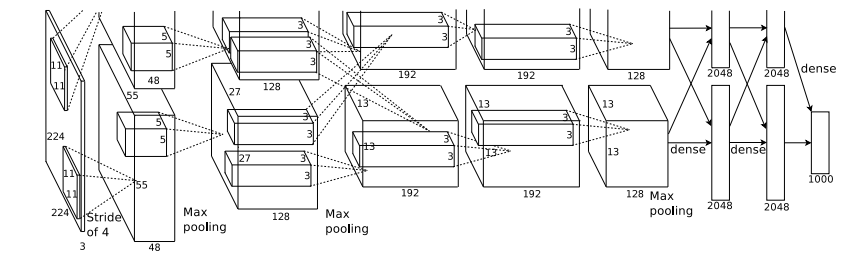

Layer은 

- Input layer - Conv1 - MaxPool1 - Norm1 - Conv2 - MaxPool2 - Norm2 - Conv3 - Conv4 - Conv5 - Maxpool3 - FC1- FC2 - Output layer 

다음과 같이 구성되어 있습니다.


## Tensorflow 버전

In [ ]:
import tensorflow as tf
import numpy as np
import tensorflow as kears
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Add
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten

ImageNet 대신 Fashion-MNIST 데이터셋을 사용했습니다. 왜나면 일단 ImageNet의 데이터셋은 너무 큽니다. 학습시키는 데에 시간이 너무나도 많이 걸립니다.

- Fashion-MNIST의 크기는 (28 x 28 x 1)이고 ImageNet의 크기는 (224 x 224 x 3)입니다. 그러므로 AlexNet의 구조를 그대로 사용시, 입력이미지가 너무 작아지기에, layer를 조금 줄였습니다.

LRN 계층은 효과가 없기에 Batch Normalization을 대신 써줬습니다

가중치 최적화는 Adam을 사용하였습니다.

 Overfitting을 방지하기 위해 Data Augmentation을 사용하였습니다. 

 

Conv2D 

- 첫 번째 인자 : 컨볼루션 필터의 수 입니다.
- 두 번째 인자 : 컨볼루션 커널의 (행, 열) 입니다.
- padding : 경계 처리 방법을 정의합니다
   - ‘valid’ : 유효한 영역만 출력이 됩니다. 따라서 출력 이미지 사이즈는 입력 사이즈보다 작습니다.
   - ‘same’ : 출력 이미지 사이즈가 입력 이미지 사이즈와 동일합니다.



In [ ]:
class AlexNet(Model):
    def __init__(self, input_shape, output_dim):
        super().__init__()

        self._layers = [
                        #Conv1 - Pool1
                        Conv2D(96, (11, 11), padding = 'same'),# ‘same’ : 출력 이미지 사이즈가 입력 이미지 사이즈와 동일합니다.
                        BatchNormalization(),
                        Activation(tf.nn.relu),
                        MaxPool2D(pool_size=(2, 2)),#2d 공간상에서 풀링작업
                        Dropout(0.25),# 드롭아웃 확률 25퍼

                        #Conv2 - Conv3 - Conv4 - Pool2
                        Conv2D(384, (5, 5), padding = 'same'),
                        BatchNormalization(),
                        Activation(tf.nn.relu),
  

                        Conv2D(384, (3, 3), padding ='same'),
                        BatchNormalization(),
                        Activation(tf.nn.relu),

                        Conv2D(256, (3, 3), padding ='same'),
                        BatchNormalization(),
                        Activation(tf.nn.relu),
                        MaxPool2D(pool_size=(3, 3)),
                        Dropout(0.25),

                        #FC1 - FC2 과적합이 될 확률이 높은 곳 중 하나
                        Flatten(),
                        Dense(3200),
                        BatchNormalization(),
                        Activation(tf.nn.relu),
                        Dropout(0.5),
                        Dense(3200),
                        BatchNormalization(),
                        Activation(tf.nn.relu),
                        Dropout(0.5),

                        # FC3
                        Dense(output_dim),
                        Activation(tf.nn.softmax)



        ]

    def call(self, x):
        for layer in self._layers:
            if isinstance(layer, list):
                for l in layer:
                    x = l(x)
            else:
                x = layer(x)
        return x

Conv1, Pool1을 통과한 뒤 바로 Conv Layer 3개를 통과하고, FC Layer를 지나는 과정을 거칩니다. 또한 AlexNet이 호출될 때 아래의 call 메서드를 보면, 그냥 말 그대로 _layers 리스트변수에 저장된 원소들을 차례로 실행합니다

 

In [ ]:
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator


batch_size = 128
num_epoch = 100
train_accuracies = []
test_accuracies = []

# Fashion MNIST 데이터 셋 가져오기

dataset, info = tfds.load('fashion_mnist', as_supervised = True, with_info = True)
dataset_test, dataset_train = dataset['test'], dataset['train']

def convert_types(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255
    return image, label

# Fashion MNIST데이터 셋에 대해 0~1 데이터로 정규화 + 10000단위로 셔플 + 배치 128단위로 묶음
dataset_train = dataset_train.map(convert_types).shuffle(10000).batch(batch_size)
dataset_test = dataset_test.map(convert_types).batch(batch_size)

#Data Augmentation
datagen = ImageDataGenerator(rotation_range = 10, horizontal_flip = True, zoom_range = 0.1)

#AlexNet 

model = AlexNet((28, 28, 1), 10)
model.build(input_shape = (None, 28, 28, 1))
model.summary()

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete1NPPU0/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete1NPPU0/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.
Model: "alex_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  11712     
_________________________________________________________________
batch_normalization (BatchNo multiple                  384       
_________________________________________________________________
activation (Activation)      multiple                  0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  

In [ ]:

loss_object = tf.keras.losses.SparseCategoricalCrossentropy() # 입력값에 대해 원핫라벨한 뒤, 교차엔트로피에 통과하여 loss검사
optimizer = tf.keras.optimizers.Adam() #최적화는 Adam사용

#훈련시 loss 저장할 변수 선언
train_loss = tf.keras.metrics.Mean(name = 'train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = 'train_accuracy')

test_loss = tf.keras.metrics.Mean(name = 'test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = 'test_accuracy')

def train_step(image, label): # 훈련 이미지, 라벨
    with tf.GradientTape() as tape:
        # 아래 내용 안에서 실행된 모든 연산을 tape에 기록
        # 그 후, 기록된 연산에 대해 역전파를 자동계산
        predictions = model(image) # 모델에 훈련 이미지 넣어서 나온 결과 저장
        loss = loss_object(label, predictions) # label과 추론 값에 대한 loss를 저장

    gradients = tape.gradient(loss, model.trainable_variables) # train_loss에는 모든 훈련 데이터에 대한 평균 loss값 저장
    optimizer.apply_gradients(zip(gradients, model.trainable_variables)) # 최적화 방법은 Adam을 써서 역전파 갱신

    train_loss(loss) # train_loss에는 모든 훈련 데이터에 대한 평균 loss값이 저장
    train_accuracy(label, predictions) # train_accuracy에는 훈련 데이터 넣을 때의 accuracy값이 저장

def test_step(image, label): # 훈련 이미지, 훈련 라벨
    predictions = model(image) # 모델에 시험 이미지 넣어서 나온 결과 저장
    loss = loss_object(label, predictions) # label과 추론값에 대한 loss를 저장

    test_loss(loss) # test_loss에는 모든 시험 데이터에 대한 평균 loss 값이 저장
    test_accuracy(label, predictions) # test_accuracy



In [ ]:
for epoch in range(num_epoch):
    for image, label in dataset_train: # 훈련 데이셋의 데이터와 레이블
        for _image, _label in datagen.flow(image, label, batch_size = batch_size):
            # Data Agumentation된 훈련 데이터를 _image, 훈련 레이블을, _label로 저장
            train_step(_image, _label) #모델에 실험 데이터 셋을 넣음
            break
            # 훈련 종료

for test_image, test_label in dataset_test: # 시험 데이터셋의 데이터와 레이블
    test_step(test_image, test_label) # 모델에 시험 데이터셋을 넣음
# 시험 데이터셋에 대한 시험 종료

train_accuracies.append(train_accuracy.result())
test_accuracies.append(test_accuracy.result())

print(f'Epoch{epoch + 1}, Loss{train_loss.result()}, Accuracy{train_accuracy.result()*100}, Test Loss:{test_loss.result()}, test_accuracy{test_accuracy.result()*100}')

# 시간이 너무 오래 걸려 도중에 얼리 스탑하였습니다.

KeyboardInterrupt: ignored

In [ ]:
for test_image, test_label in dataset_test: # 시험 데이터셋의 데이터와 레이블
    test_step(test_image, test_label) # 모델에 시험 데이터셋을 넣음
# 시험 데이터셋에 대한 시험 종료

train_accuracies.append(train_accuracy.result())
test_accuracies.append(test_accuracy.result())

print(f'Epoch{epoch + 1}, Loss{train_loss.result()}, Accuracy{train_accuracy.result()}, Test Loss:{test_loss.result()}, test_accuracy{test_accuracy.result()}')


Epoch44, Loss0.18958619236946106, Accuracy0.9273327589035034, Test Loss:0.34585970640182495, test_accuracy0.916700005531311


## Pytorch 버전 (진행중)

In [ ]:
!pip install tensorboardX

     |████████████████████████████████| 122kB 12.6MB/s 


In [ ]:
import os
import torch
import torch.nn as nn #신경망을 구축하기 위한 데이터 구조나 레이어 존재: RNN LSTM, ReLU, MSELoss
import torch.optim as optim #확률적 경사 하강법같은 최적화 알고리즘 구현이 되어있음 
import torch.nn.functional as F 
from torch.utils import data # SGD의 반복 연산을 실행할 때 사용되는 미니 배치용 유틸 함수가 존재
import torchvision.datasets as datasets 
import torchvision.transforms as transforms
from tensorboardX import SummaryWriter

In [ ]:
!nvidia-smi # Jupyter Notebook에서 명령어를 입력할 경우

Sun Jun 13 12:56:56 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# pytorch device 정의하기
# gpu 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')